### Exercise 10.7: Volume of a hypersphere

Estimate the volume of a sphere of unit radius in ten dimensions using Monte Carlo method. Consider the equivalent problem in two dimensions, the area of a circle of unit radius

<div>
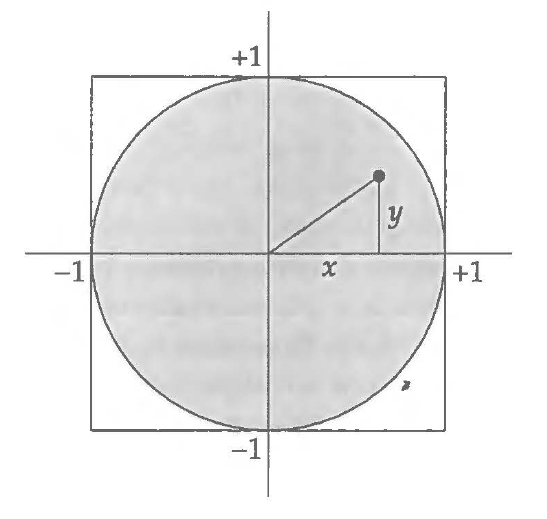
</div>

The area of the circle, the shaded area above, is given by the integral

$$ I = \iint_{-1}^1 f(x,y) dxdy $$

where $f(x,y)=1$ everwhere inside the circle and zero everywhere outside. In other words,

$$ f(x,y) =
\begin{cases}
    1 & \text{if}\, x^2+y^2 \leq 1 \\
    0 & \text{otherwise}
\end{cases}
$$

for which the area of the circle can be calculated by Monte Carlo integration. This can be done by generating a set of $N$ random points $(x,y)$, where both $x$ and $y$ are in the range from $-1$ to $1$. Then, the two-dimensional version for this calculation would be $$ I \approx \frac{4}{N} \sum_{i=1}^{N} f(x_i,y_i) $$

Generalize this method to the ten-dimensional case and write a program to perform a Monte Carlo calculation of the volume of a sphere of unit radius in ten dimensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can attempt to numerically determine the volume of the sphere of arbitrary dimension using the *Hit and Miss Method*, similar to the integral set above. In $d$-dimensions, the hypersphere is defined by $$ x_1^2 + x_2^2 + x_3^2 + \cdots + x_d^2 \leq R^2 $$

For convenience, we will only sphere of radius 1 and points in the positive quadrant. In two dimensions, the sphere is projected as a circle whose volume is equal to its area $A_{2D} = \pi R^2$. These calculation is often used as a Monte Carlo calculation of the numerical value of $\pi$.

In [2]:
# Initializing the parameters
radius = 1
trial_count = int(1e6)

In [3]:
hit_count = 0
dimension = 2

for i in range(trial_count):
    x1 = np.random.uniform()
    x2 = np.random.uniform()
    R = np.sqrt(x1**2 + x2**2)
    if R <= 1:
        hit_count += 1

In [4]:
volume2d = 2**dimension*(hit_count/trial_count)
print("The calculated volume of a 2D sphere is {:.5f} while the actual volume is around {:.5f}.".format(volume2d, np.pi))

The calculated volume of a 2D sphere is 3.13944 while the actual volume is around 3.14159.


For an actual sphere in three dimensions,

In [5]:
dimension = 3
hit_count = 0

for i in range(trial_count):
    x1 = np.random.uniform()
    x2 = np.random.uniform()
    x3 = np.random.uniform()
    R = np.sqrt(x1**2 + x2**2 + x3**2)
    if R <= 1:
        hit_count += 1

In [6]:
volume3d = 2**dimension*(hit_count/trial_count)
actual_volume3d = (4/3)*np.pi*radius**3
print("The calculated volume of a 3D sphere is {:.5f} while the actual volume is around {:.5f}.".format(volume3d, actual_volume3d))

The calculated volume of a 3D sphere is 4.18700 while the actual volume is around 4.18879.


In [7]:
def square_sum(n):
    return np.sum(n**2)

def hypersphere_array(dimension):
    xvals_array = np.zeros(dimension)
    for d in range(int(dimension)):
        random_num = np.random.uniform()
        xvals_array[d] = square_sum(random_num)
    return xvals_array

def hypersphere_volume(dimension):
    hit_count, trial_count = 0, 1e6
    for i in range((int(trial_count))):
        squares = np.sum(hypersphere_array(dimension))
        if squares <= 1:
            hit_count += 1
    volume = 2**dimension*(hit_count/trial_count)
    return volume

In [8]:
max_dimension = int(15)
trial_count = 1000000

dimension_array = [dim for dim in range(max_dimension + 1)]
volume_array = []

for dimension in dimension_array:
    points = np.random.uniform(size = dimension*trial_count).reshape(trial_count, dimension)
    xvals = np.sum(points**2, axis = 1)
    hit_count = np.sum(xvals <= 1)
    result = 2**dimension*(hit_count/trial_count)
    volume_array.append(result)

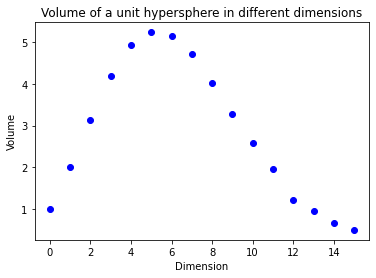

In [9]:
plt.scatter(dimension_array, volume_array, color = "b")
plt.title(r"Volume of a unit hypersphere in different dimensions")
plt.xlabel(r"Dimension")
plt.ylabel(r"Volume")
plt.savefig("hypersphere volume.png", dpi = 1000)

### Exercise 10.9: The Ising model

The Ising model is a theoretical model of a magnet. The magnetization of a magneticmaterial is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment-it becomes magnetized. The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice:

<div>
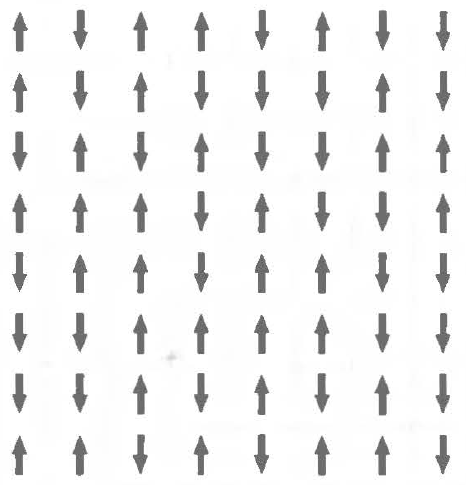
</div>

Mathematically the spins are represented by variables $ s = \pm 1$ on the points of the lattice, $+1$ for up-pointing spins and $-1$ for down-pointing ones. Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to $$ E = -J \sum_{i,j} \sigma_i\sigma_j $$ where index indicates a sum over pairs $i,j$ that are adjacent on the lattice. Write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins.

In [10]:
N = 100 # lattice size
J = 1
T = 1
kB = 1
beta = 1/(kB*T) # inverse relationship with temperature

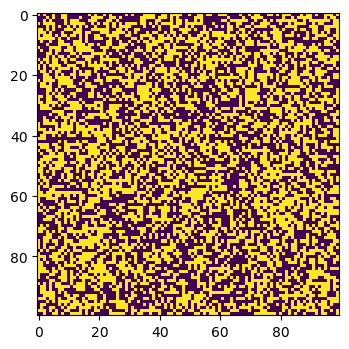

In [11]:
spins = np.random.choice([-1,1], (N,N))

plt.figure(dpi = 100)
plt.imshow(spins)
plt.savefig("initial spin grid.png", dpi = 1000)

In [12]:
def lattice_energy(lattice, J = 1):
    sigma_i = np.sum(lattice[1:,:]*lattice[:-1,:])
    sigma_j = np.sum(lattice[:,1:]*lattice[:,:-1])
    return -J*(sigma_i + sigma_j)

#### Metropolis Algorithm

We want to find the equilibrium state in a magnet at a particular temperature by taking into account how many $\sigma_i$ are $+1$ and $-1$. Starting with a random lattice of spins, we subject magnet to a temperature bath that makes the spins move until it fixes itself into equilibrium. Note that $$\frac{p_v}{p_{\mu}} = e^{-\beta(E_v-E_{\mu})}, \qquad -\beta(E_v-E_{\mu}) = -\beta J\sum_{k=1}^{4} \sigma_i\sigma_j$$

where $i$ is the spin being flipped and $\sigma_k$ are the four nearest neighbbours to that spin. Note on the boundaries, sometimes things might have less than four neighbors.

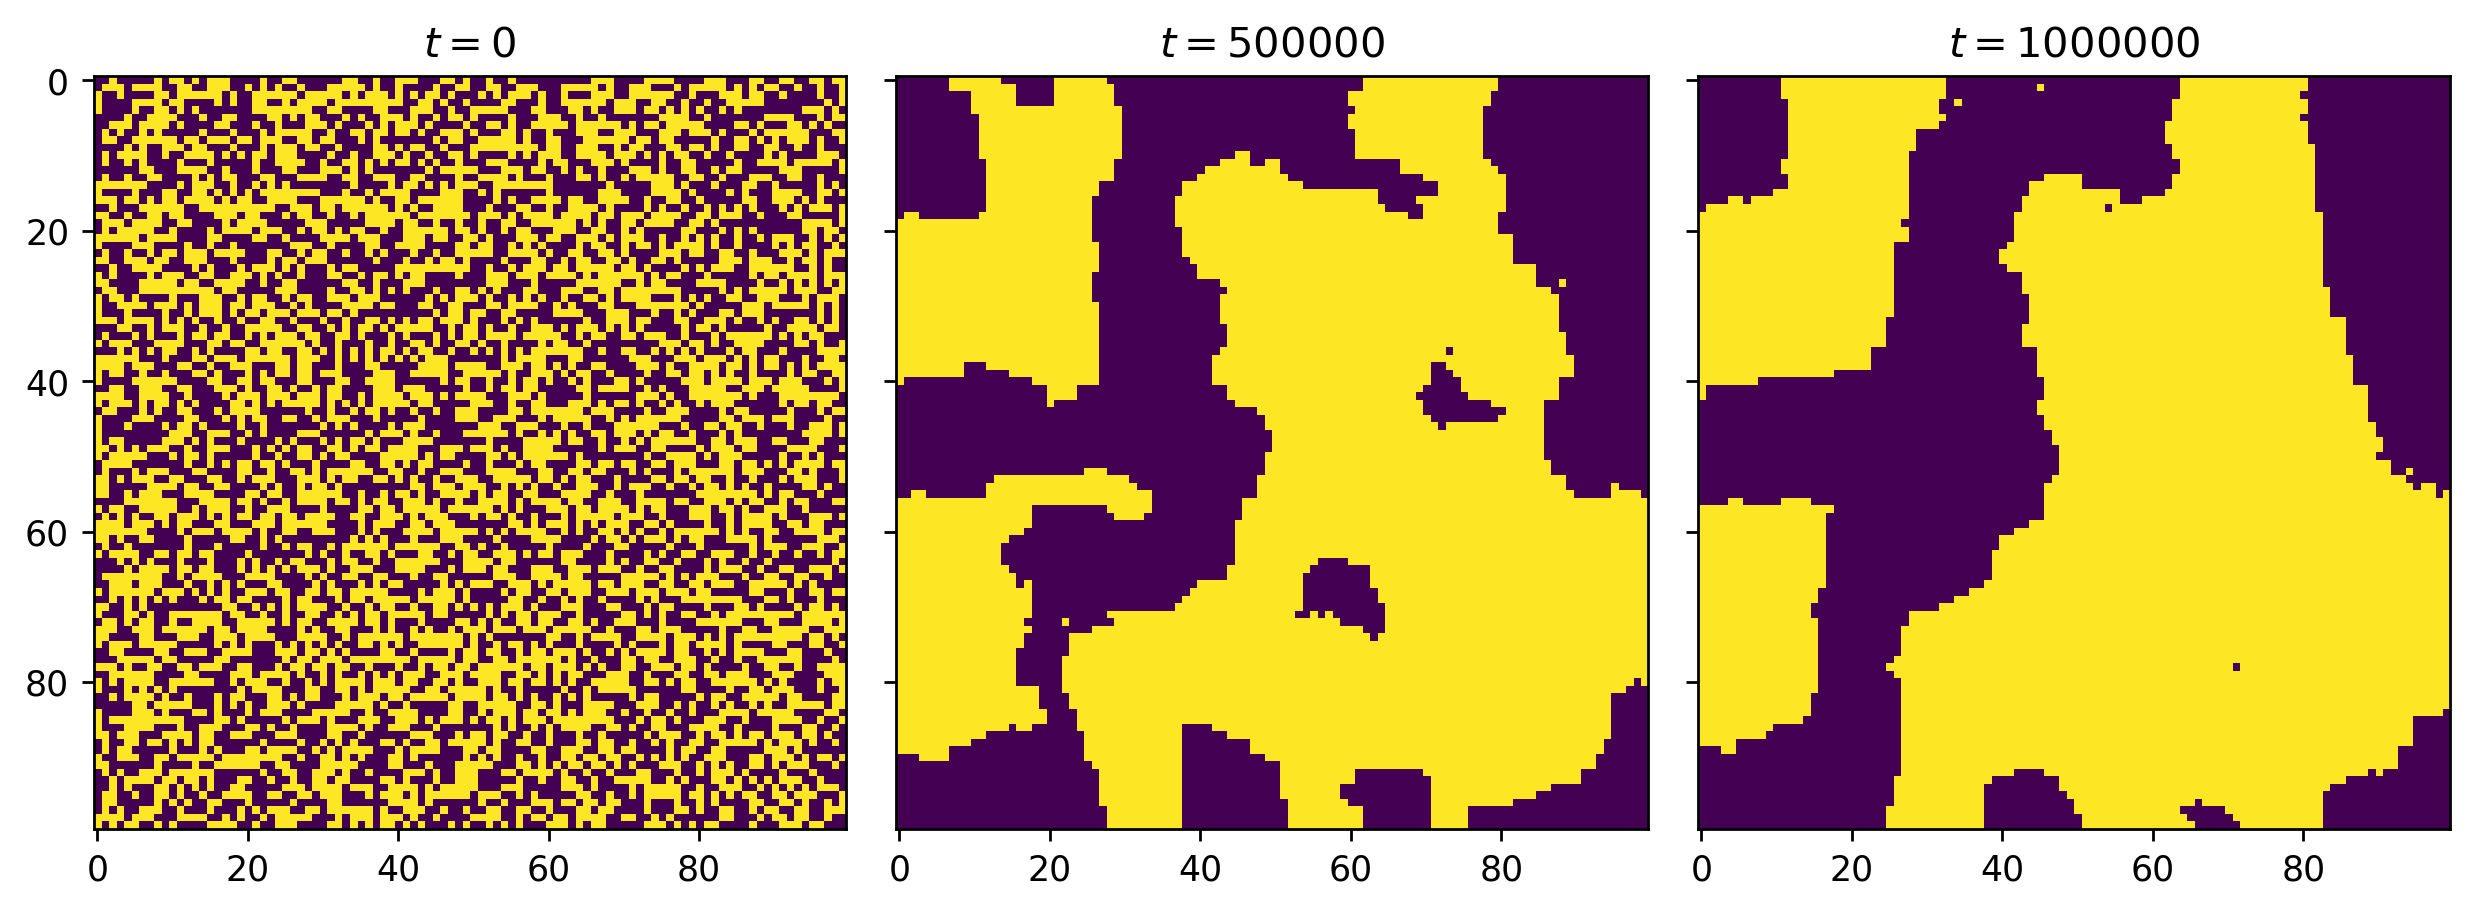

In [13]:
# Initialize initial spin lattice
spins = np.random.choice([1,-1], (N,N))

fig, ax = plt.subplots(1, 3, figsize=(10,20), sharey = True, dpi = 250)
ax[0].imshow(spins)
ax[0].set_title(r'$t = 0$')

energy = lattice_energy(spins)
energy_array = [energy]
steps = 1000000

for step in range(steps):
    # Choose a random spin
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
    new_spins = spins.copy()
    new_spins[i,j] = -new_spins[i,j] # Spin flip

    final_energy = lattice_energy(new_spins)
    dE = final_energy - lattice_energy(spins)

    if np.random.random() < np.exp(-beta*dE):
        spins = new_spins
        energy += dE
    energy_array.append(energy)

    if step == 500000:
        ax[1].imshow(spins) 
        ax[1].set_title(r'$t = 500000$')

ax[2].imshow(spins) 
ax[2].set_title(r'$t = 1000000$')
fig.tight_layout()
fig.savefig("spin grid evolution.png", dpi = 1000)